In [54]:
import ogr,json,random

## 使用GDAL读取Shapefile数据

In [55]:
driver = ogr.GetDriverByName('ESRI Shapefile')
dataSource = driver.Open("../data/chinaS/CNPG_S.shp", 0)
layer = dataSource.GetLayerByIndex(0)

In [56]:
lyd = layer.GetLayerDefn()
fields = [lyd.GetFieldDefn(i).GetName() for i in range(lyd.GetFieldCount())]
print(fields)

['FIRST_NAME', 'Code', 'AREA', 'Pop_2009', 'Pop_2005', 'Pop_2000', 'Pop_1999', 'Pop_1995', 'Pop_1990', 'Pop_Birth_', 'Pop_Death_', 'GDP_2009', 'GDP_2008', 'GDP_2007', 'GDP_2006', 'GDP_2005', 'CPI_2009', 'CATEGORIES']


In [57]:
minx,maxx,miny,maxy = layer.GetExtent()

In [58]:
china = {}

In [59]:
layer = dataSource.GetLayerByIndex(0)
for i in range(layer.GetFeatureCount()):
    feat = layer.GetFeature(i)
    geo = feat.GetGeometryRef()
    china[feat.GetField("FIRST_NAME")] = json.loads(geo.ExportToJson())

In [60]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

### 这个方法用来设置颜色的

In [61]:
def getColor(colName, colNum):
    cm = plt.cm.get_cmap(colName)
    return [cm(float(i)/(colNum)) for i in range(colNum)]
color = getColor("tab20",20)

### 直接用matplotlib绘制面要素

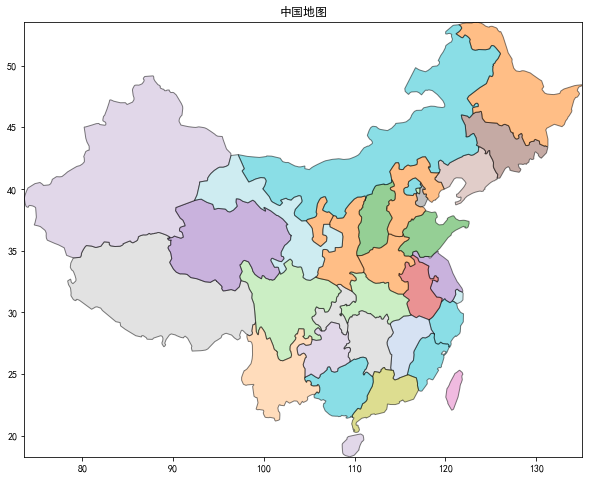

In [65]:
fig = plt.figure(figsize=(10,8)) 
ax = plt.subplot()
for cn in china:
    cn = china[cn]
    if cn["type"] == "Polygon":
        poly = plt.Polygon(cn["coordinates"][0],ec = '#000000',
                           fc=random.choice(color), alpha = 0.5)
        ax.add_patch(poly)
    else:
        for c in cn["coordinates"]:
            poly = plt.Polygon(c[0], ec = '#000000',
                               fc=random.choice(color), alpha = 0.5)
            ax.add_patch(poly)
ax.set_xlim(minx,maxx)
ax.set_ylim(miny,maxy)
plt.title("中国地图")
plt.show()

In [63]:
import folium

### 下面这段代码，是把matplotlib的颜色变成16进制RGB模式颜色

In [74]:
color2 = []
for c in color:
    c1= "#"
    for f in c:
        s = "{0}".format(hex(int(f*255)))
        if len(s) <4:
            s= "0{0}".format(s[2:])
        else:
            s = "{0}".format(s[2:])
        c1 += s
    color2.append(c1)

In [79]:
m = folium.Map(
    location=[39, 112.5],
    zoom_start=4
)
for cn in china:
    if china[cn]["type"] == "Polygon":
        coo = [[x[1],x[0]] for x in china[cn]["coordinates"][0]]
    else:
        coo = []
        for c in china[cn]["coordinates"]:
            coo.append([[x[1],x[0]] for x in c[0]])
    cl = random.choice(color2)
    folium.Polygon(
        locations=coo,
        popup=cn,
        fill_color=cl,
        color=cl,
        fill_opacity=0.8
    ).add_to(m)
m